In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('matala2_cosmetics_2019-Nov.csv')
data.head()

C:\Users\lenovo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09 UTC,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10 UTC,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11 UTC,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb


In [3]:
data = data.iloc[0:1000].append(data.iloc[3950000:4000000])

### Q num 1

In [49]:
data['event_time'] = pd.to_datetime(data['event_time'])

data = data.sort_values(['user_id', 'user_session', 'event_time'])

data['duration_to_next_event'] = data.groupby(['user_id', 'user_session'])['event_time'].diff().fillna(pd.Timedelta(seconds=0))

data['duration_to_next_event'] = data['duration_to_next_event'].dt.total_seconds()


### Q num 2

In [51]:
from datetime import datetime

df_q2 = data.copy()

#df_q2['event_time'] = pd.to_datetime(df_q2['event_time'])
df_q2['event_date'] = df_q2['event_time'].apply(lambda x: datetime.strptime(x.strftime('%Y-%m-%d'), '%Y-%m-%d'))

df_q2 = df_q2[['user_id','event_date', 'user_session']].drop_duplicates().sort_values(['user_id','event_date'])

df_q2['diff'] = (df_q2.groupby('user_id')['event_date'].diff() / np.timedelta64(1, 'D')).fillna(0.0)

df_q2['diff5plus'] = np.where((df_q2['diff'] <= 5 ), 0, 1)

df_q2['funnel_number'] = df_q2.groupby('user_id')['diff5plus'].cumsum() + 1 
df_q2

,user_id,event_date,user_session,diff,diff5plus,funnel_number
157,202438687,2019-11-01,8dc848f5-bac3-44d7-9414-75d4e599abaf,0.0,0,1
756,237848862,2019-11-01,0d8075fc-6601-40ef-bb59-8ac5e371a62e,0.0,0,1
38,239732557,2019-11-01,a245fe93-cc60-421f-b321-5c6ba8051155,0.0,0,1
122,249305749,2019-11-01,e707213f-7920-49e5-9386-55e3a516e069,0.0,0,1
489,250802970,2019-11-01,c47628b7-de02-44c4-9870-ad4e6a6f2f75,0.0,0,1
...,...,...,...,...,...,...
950,566287718,2019-11-01,909d05e9-e1af-4876-b3fc-169cd28e6d20,0.0,0,1
954,566287805,2019-11-01,476fa026-19e2-4e11-bcf7-2875f35f0a98,0.0,0,1
963,566287902,2019-11-01,b543438c-b32d-4920-8cfe-c70d0453ceb8,0.0,0,1
967,566288008,2019-11-01,42bd2b3c-02fe-400e-8068-041c3a709533,0.0,0,1


### Q num 3

In [52]:
df_q2['index_in_funnel'] = df_q2.groupby(['user_id', 'funnel_number']).cumcount() + 1
df_q2

,user_id,event_date,user_session,diff,diff5plus,funnel_number,index_in_funnel
157,202438687,2019-11-01,8dc848f5-bac3-44d7-9414-75d4e599abaf,0.0,0,1,1
756,237848862,2019-11-01,0d8075fc-6601-40ef-bb59-8ac5e371a62e,0.0,0,1,1
38,239732557,2019-11-01,a245fe93-cc60-421f-b321-5c6ba8051155,0.0,0,1,1
122,249305749,2019-11-01,e707213f-7920-49e5-9386-55e3a516e069,0.0,0,1,1
489,250802970,2019-11-01,c47628b7-de02-44c4-9870-ad4e6a6f2f75,0.0,0,1,1
...,...,...,...,...,...,...,...
950,566287718,2019-11-01,909d05e9-e1af-4876-b3fc-169cd28e6d20,0.0,0,1,1
954,566287805,2019-11-01,476fa026-19e2-4e11-bcf7-2875f35f0a98,0.0,0,1,1
963,566287902,2019-11-01,b543438c-b32d-4920-8cfe-c70d0453ceb8,0.0,0,1,1
967,566288008,2019-11-01,42bd2b3c-02fe-400e-8068-041c3a709533,0.0,0,1,1


### Q num 4


In [53]:
import re

regex = r'\d+\.?\d*'

data['price'] = data['price'].apply(lambda x: float(re.findall(regex, str(x))[0]) if re.findall(regex, str(x)) else None)

data[data['user_id']==439472531]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event
156,2019-11-01 00:12:53+00:00,view,4653,1487580011157258342,NaN,runail,0.37,439472531,d8111fe9-0a96-44bc-9a7d-154de963b7e0,0.0
107,2019-11-01 00:08:38+00:00,view,4638,1487580011157258342,NaN,runail,0.37,439472531,e7cbcdaa-e179-4fff-b87d-97f03b48df7e,0.0
110,2019-11-01 00:09:01+00:00,view,4639,1487580011157258342,NaN,runail,0.37,439472531,e7cbcdaa-e179-4fff-b87d-97f03b48df7e,23.0
116,2019-11-01 00:09:24+00:00,view,4639,1487580011157258342,NaN,runail,0.37,439472531,e7cbcdaa-e179-4fff-b87d-97f03b48df7e,23.0
120,2019-11-01 00:09:35+00:00,view,5666406,1487580011157258342,NaN,irisk,0.63,439472531,e7cbcdaa-e179-4fff-b87d-97f03b48df7e,11.0
123,2019-11-01 00:09:53+00:00,view,5666407,1487580011157258342,NaN,irisk,0.63,439472531,e7cbcdaa-e179-4fff-b87d-97f03b48df7e,18.0
125,2019-11-01 00:10:01+00:00,view,5729011,1487580007776650194,NaN,ingarden,0.79,439472531,e7cbcdaa-e179-4fff-b87d-97f03b48df7e,8.0
129,2019-11-01 00:10:14+00:00,view,4638,1487580011157258342,NaN,runail,0.37,439472531,e7cbcdaa-e179-4fff-b87d-97f03b48df7e,13.0
130,2019-11-01 00:10:35+00:00,view,4817,1487580011157258342,NaN,runail,0.37,439472531,e7cbcdaa-e179-4fff-b87d-97f03b48df7e,21.0
133,2019-11-01 00:10:47+00:00,view,4654,1487580011157258342,NaN,runail,0.37,439472531,e7cbcdaa-e179-4fff-b87d-97f03b48df7e,12.0


### Q num 5

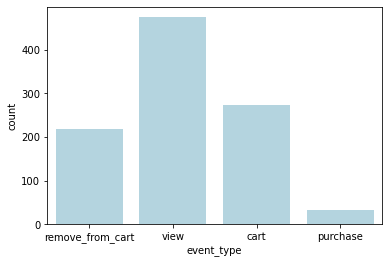

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='event_type',data=data, color='lightblue')
plt.show()

### Q num 6

In [55]:
data_copy = data.copy()

data_copy['session_duration'] = (data_copy.groupby(['user_session'])['event_time'].diff() / np.timedelta64(1, 's')).fillna(0.0)

data_copy['total_events'] = data_copy.groupby('user_session')['event_type'].transform('count')

In [56]:
def funci (event_type, data , name_list):
    data[name_list] = data[data['event_type']==event_type]['product_id'].groupby(data['user_session']).transform(lambda x: [x.tolist()]*len(x))
    return data

In [57]:
funci('view',data_copy,'list_of_viewed')
funci('cart',data_copy,'list_of_added_to_cart')
funci('purchase',data_copy,'list_of_purchased')


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,session_duration,total_events,list_of_viewed,list_of_added_to_cart,list_of_purchased
157,2019-11-01 00:13:10+00:00,remove_from_cart,5761411,1487580007432717250,NaN,ingarden,2.86,202438687,8dc848f5-bac3-44d7-9414-75d4e599abaf,0.0,0.0,70,NaN,NaN,NaN
158,2019-11-01 00:13:12+00:00,remove_from_cart,5749154,1487580007592100809,NaN,NaN,0.22,202438687,8dc848f5-bac3-44d7-9414-75d4e599abaf,2.0,2.0,70,NaN,NaN,NaN
159,2019-11-01 00:13:14+00:00,remove_from_cart,5749145,1487580007592100809,NaN,NaN,0.22,202438687,8dc848f5-bac3-44d7-9414-75d4e599abaf,2.0,2.0,70,NaN,NaN,NaN
160,2019-11-01 00:13:16+00:00,remove_from_cart,5749153,1487580007592100809,NaN,NaN,0.22,202438687,8dc848f5-bac3-44d7-9414-75d4e599abaf,2.0,2.0,70,NaN,NaN,NaN
161,2019-11-01 00:13:16+00:00,remove_from_cart,5749153,1487580007592100809,NaN,NaN,0.22,202438687,8dc848f5-bac3-44d7-9414-75d4e599abaf,0.0,0.0,70,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,2019-11-01 01:04:45+00:00,view,4766,1487580010796548183,NaN,runail,0.38,566287902,b543438c-b32d-4920-8cfe-c70d0453ceb8,0.0,0.0,1,[4766],NaN,NaN
967,2019-11-01 01:05:40+00:00,view,5587660,1487580008145748965,NaN,roubloff,4.75,566288008,42bd2b3c-02fe-400e-8068-041c3a709533,0.0,0.0,1,[5587660],NaN,NaN
975,2019-11-01 01:06:53+00:00,view,5899435,1487580013950664926,NaN,NaN,19.89,566288039,209e5c4c-30af-40aa-8340-727e5f5c1584,0.0,0.0,3,[5899435],NaN,NaN
980,2019-11-01 01:08:03+00:00,cart,5749199,1487580013053083824,stationery.cartrige,italwax,1.98,566288039,209e5c4c-30af-40aa-8340-727e5f5c1584,70.0,70.0,3,NaN,"[5749199, 5766980]",NaN


In [60]:
data_copy['event_time'] = pd.to_datetime(data_copy['event_time'])
data_copy = data_copy.sort_values(['user_id', 'event_time'])
data_copy['time_diff'] = data_copy.groupby('user_id')['event_time'].diff()
data_copy['funnel_number'] = data_copy.groupby('user_id')['time_diff'].apply(lambda x: (x > pd.Timedelta(days=5)).cumsum() + 1)
data_copy['funnel_number'] = data_copy.groupby('user_id')['funnel_number'].apply(lambda x: x.fillna(1))
data_copy = data_copy.drop('time_diff', axis=1)
data_copy['index_in_funnel'] = data_copy.groupby(['user_id', 'funnel_number']).cumcount() + 1
data_copy

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,session_duration,total_events,list_of_viewed,list_of_added_to_cart,list_of_purchased,funnel_number,index_in_funnel
157,2019-11-01 00:13:10+00:00,remove_from_cart,5761411,1487580007432717250,NaN,ingarden,2.86,202438687,8dc848f5-bac3-44d7-9414-75d4e599abaf,0.0,0.0,70,NaN,NaN,NaN,1,1
158,2019-11-01 00:13:12+00:00,remove_from_cart,5749154,1487580007592100809,NaN,NaN,0.22,202438687,8dc848f5-bac3-44d7-9414-75d4e599abaf,2.0,2.0,70,NaN,NaN,NaN,1,2
159,2019-11-01 00:13:14+00:00,remove_from_cart,5749145,1487580007592100809,NaN,NaN,0.22,202438687,8dc848f5-bac3-44d7-9414-75d4e599abaf,2.0,2.0,70,NaN,NaN,NaN,1,3
160,2019-11-01 00:13:16+00:00,remove_from_cart,5749153,1487580007592100809,NaN,NaN,0.22,202438687,8dc848f5-bac3-44d7-9414-75d4e599abaf,2.0,2.0,70,NaN,NaN,NaN,1,4
161,2019-11-01 00:13:16+00:00,remove_from_cart,5749153,1487580007592100809,NaN,NaN,0.22,202438687,8dc848f5-bac3-44d7-9414-75d4e599abaf,0.0,0.0,70,NaN,NaN,NaN,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,2019-11-01 01:04:45+00:00,view,4766,1487580010796548183,NaN,runail,0.38,566287902,b543438c-b32d-4920-8cfe-c70d0453ceb8,0.0,0.0,1,[4766],NaN,NaN,1,1
967,2019-11-01 01:05:40+00:00,view,5587660,1487580008145748965,NaN,roubloff,4.75,566288008,42bd2b3c-02fe-400e-8068-041c3a709533,0.0,0.0,1,[5587660],NaN,NaN,1,1
975,2019-11-01 01:06:53+00:00,view,5899435,1487580013950664926,NaN,NaN,19.89,566288039,209e5c4c-30af-40aa-8340-727e5f5c1584,0.0,0.0,3,[5899435],NaN,NaN,1,1
980,2019-11-01 01:08:03+00:00,cart,5749199,1487580013053083824,stationery.cartrige,italwax,1.98,566288039,209e5c4c-30af-40aa-8340-727e5f5c1584,70.0,70.0,3,NaN,"[5749199, 5766980]",NaN,1,2


In [62]:
session_data = data_copy[['user_id', 'user_session', 'funnel_number', 'index_in_funnel', 'total_events', 'session_duration', 'list_of_viewed', 'list_of_added_to_cart', 'list_of_purchased']]
session_data

,user_id,user_session,funnel_number,index_in_funnel,total_events,session_duration,list_of_viewed,list_of_added_to_cart,list_of_purchased
157,202438687,8dc848f5-bac3-44d7-9414-75d4e599abaf,1,1,70,0.0,NaN,NaN,NaN
158,202438687,8dc848f5-bac3-44d7-9414-75d4e599abaf,1,2,70,2.0,NaN,NaN,NaN
159,202438687,8dc848f5-bac3-44d7-9414-75d4e599abaf,1,3,70,2.0,NaN,NaN,NaN
160,202438687,8dc848f5-bac3-44d7-9414-75d4e599abaf,1,4,70,2.0,NaN,NaN,NaN
161,202438687,8dc848f5-bac3-44d7-9414-75d4e599abaf,1,5,70,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
963,566287902,b543438c-b32d-4920-8cfe-c70d0453ceb8,1,1,1,0.0,[4766],NaN,NaN
967,566288008,42bd2b3c-02fe-400e-8068-041c3a709533,1,1,1,0.0,[5587660],NaN,NaN
975,566288039,209e5c4c-30af-40aa-8340-727e5f5c1584,1,1,3,0.0,[5899435],NaN,NaN
980,566288039,209e5c4c-30af-40aa-8340-727e5f5c1584,1,2,3,70.0,NaN,"[5749199, 5766980]",NaN
